In [70]:
# import manipulation lybrary
import numpy as np
import pandas as pd

# import visualization lybrary
import matplotlib.pyplot as plt
import seaborn as sns

# import logging lybrary
import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filemode='w',
                    filename='supplychain.log',
                    force=True)

# import warning lybrary
import warnings
warnings.filterwarnings('ignore')

from collections import OrderedDict

In [71]:
# Step1: Data Ingestion

def data_ingestion():

  try:
    df = pd.read_csv(r'C:\SupplyChainManagement_PredictionModel\data\raw\SupplyChain_Dataset.csv')
    logging.info("Dataset successfully uploaded")

  except:
    logging.info("Check the location of file")
  return df

# Step2: Data Exploration
def data_exploration(df):
  # Segregate Numerical and Categorical Columns
  numerical_col = df.select_dtypes(exclude  = 'object').columns
  categorical_col = df.select_dtypes(include = 'object').columns

  # Numerical Descriptive Stats
  numerical_stats = []

  Q1 = df[numerical_col].quantile(0.25)
  Q3 = df[numerical_col].quantile(0.75)
  IQR = Q3 - Q1
  LW = Q1 - 1.5*IQR
  UW = Q3 + 1.5*IQR
  Outlier_Count = (df[numerical_col] < LW) | (df[numerical_col] > UW)
  Outlier_Percentage = (Outlier_Count.sum()/len(df))*100

  for i in numerical_col:
    num_stats = OrderedDict({
        "Feature":i,
        "Count":df[i].count(),
        "Maximum":df[i].max(),
        "Minimum":df[i].min(),
        "Mean":df[i].mean(),
        "Median":df[i].median(),
        "Q1":Q1,
        "Q3":Q3,
        "IQR":IQR,
        "Lower_Whisker":LW,
        "Upper_Whisker":UW,
        "Outlier_Count": Outlier_Count.sum(),
        "Outlier_Percentage":Outlier_Percentage,
        "Skewness":df[i].skew(),
        "Kurtosis":df[i].kurtosis(),
        "Standard Deviation":df[i].std()

    })

    numerical_stats.append(num_stats)
    numerical_stats_report = pd.DataFrame(numerical_stats)

  # Categorical Descriptive Stats

  categorical_stats = []

  for i in categorical_col:
    cat_stats = OrderedDict({
        "Feature":i,
        "Count":df[i].count(),
        "Unique_Count":df[i].nunique(),
        "Mode":df[i].mode(),
        "Value_Counts":df[i].value_counts()
    })
    categorical_stats.append(cat_stats)
    categorical_stats_report = pd.DataFrame(categorical_stats)

  return numerical_stats_report, categorical_stats_report

# Step3: Dataset Information
def dataset_info(df):
  print(df.info())
        

In [72]:
df = data_ingestion()
numerical_stats_report, categorical_stats_report = data_exploration(df)
info = dataset_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days_for_shipping_(real)       180519 non-null  int64  
 2   Days_for_shipment_(scheduled)  180519 non-null  int64  
 3   Benefit_per_order              180519 non-null  float64
 4   Sales_per_customer             180519 non-null  float64
 5   Delivery_Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category_Id                    180519 non-null  int64  
 8   Category_Name                  180519 non-null  object 
 9   Customer_City                  180519 non-null  object 
 10  Customer_Country               180519 non-null  object 
 11  Customer_Email                 180519 non-null  object 
 12  Customer_Fname                

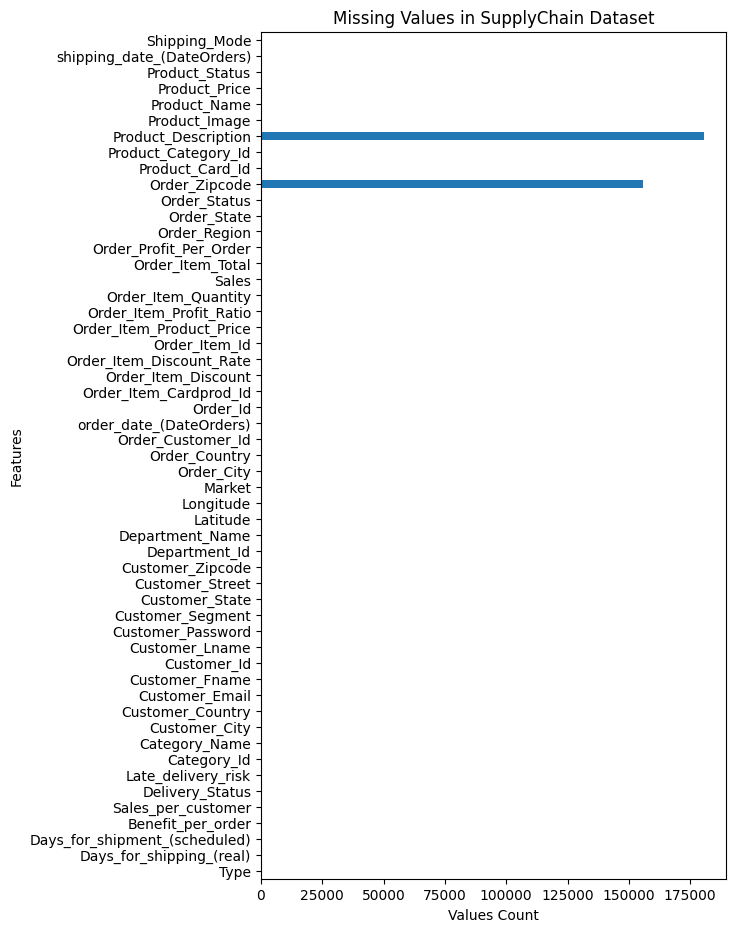

In [73]:
# Data Cleaning

# Checking Duplicated Entries
df.duplicated().sum()
# This will help us to drop the duplicated entries from the dataset
df.drop_duplicates(inplace = True)
# Check the missing values in dataset
plt.figure(figsize=(6,11))
df.isna().sum().plot(kind = 'barh')
plt.title("Missing Values in SupplyChain Dataset")
plt.xlabel("Values Count")
plt.ylabel("Features")
plt.show()

# Dropping Product_Description and Oder_Zipcode columns as these columns how more number of missing values
df.drop(columns = ['Product_Description','Order_Zipcode'],axis = 1,inplace = True)

In [74]:
pd.set_option("display.max_columns",None)
df

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,Customer_Country,Customer_Email,Customer_Fname,Customer_Id,Customer_Lname,Customer_Password,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Department_Id,Department_Name,Latitude,Longitude,Market,Order_City,Order_Country,Order_Customer_Id,order_date_(DateOrders),Order_Id,Order_Item_Cardprod_Id,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Region,Order_State,Order_Status,Product_Card_Id,Product_Category_Id,Product_Image,Product_Name,Product_Price,Product_Status,shipping_date_(DateOrders),Shipping_Mode
0,DEBIT,3,4,91.25000,314.64001,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.25145,-66.03706,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018,77202,1360,13.11,0.04,180517,328,0.29,1,327.75000,314.64001,91.25,Southeast Asia,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018,Standard Class
1,TRANSFER,5,4,-249.09000,311.35999,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.27945,-66.03706,Pacific Asia,Bikaner,India,19492,1/13/2018,75939,1360,16.39,0.05,179254,328,-0.80,1,327.75000,311.35999,-249.09,South Asia,Rajastan,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018,Standard Class
2,CASH,4,4,-247.78000,309.72000,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.29223,-121.88128,Pacific Asia,Bikaner,India,19491,1/13/2018,75938,1360,18.03,0.06,179253,328,-0.80,1,327.75000,309.72000,-247.78,South Asia,Rajastan,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018,Standard Class
3,DEBIT,3,4,22.86000,304.81000,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.12595,-118.29102,Pacific Asia,Townsville,Australia,19490,1/13/2018,75937,1360,22.94,0.07,179252,328,0.08,1,327.75000,304.81000,22.86,Oceania,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018,Standard Class
4,PAYMENT,2,4,134.21001,298.25000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.25377,-66.03705,Pacific Asia,Townsville,Australia,19489,1/13/2018,75936,1360,29.50,0.09,179251,328,0.45,1,327.75000,298.25000,134.21,Oceania,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.00000,399.98001,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.64093,-73.94271,Pacific Asia,Shanghai,China,1005,1/16/2016,26043,1004,0.00,0.00,65177,400,0.10,1,399.98001,399.98001,40.00,Eastern Asia,Shanghai,CLOSED,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.98,0,1/20/2016,Standard Class
180515,DEBIT,3,2,-613.77002,395.98001,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,9141,Clark,XXXXXXXXX,Corporate,CA,7330 Broad Apple Moor,93304.0,7,Fan Shop,35.36255,-119.01870,Pacific Asia,Hirakata,Japon,9141,1/16/2016,26037,1004,4.00,0.01,65161,400,-1.55,1,399.98001,395.980

In [75]:
# Data Preprocessing
# Change Datatype of two columns
df["order_date_(DateOrders)"] = pd.to_datetime(df["order_date_(DateOrders)"])
df["shipping_date_(DateOrders)"] = pd.to_datetime(df["shipping_date_(DateOrders)"])

df["order_month"] = df["order_date_(DateOrders)"].dt.month
df["order_year"] = df["order_date_(DateOrders)"].dt.year
df["order_day"] = df["order_date_(DateOrders)"].dt.day

df["shipping_month"] = df["shipping_date_(DateOrders)"].dt.month
df["shipping_year"] = df["shipping_date_(DateOrders)"].dt.year
df["shipping_day"] = df["shipping_date_(DateOrders)"].dt.day

In [76]:
# Checking Dataset top five rows using .head()
df.head()

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,Customer_Country,Customer_Email,Customer_Fname,Customer_Id,Customer_Lname,Customer_Password,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Department_Id,Department_Name,Latitude,Longitude,Market,Order_City,Order_Country,Order_Customer_Id,order_date_(DateOrders),Order_Id,Order_Item_Cardprod_Id,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Region,Order_State,Order_Status,Product_Card_Id,Product_Category_Id,Product_Image,Product_Name,Product_Price,Product_Status,shipping_date_(DateOrders),Shipping_Mode,order_month,order_year,order_day,shipping_month,shipping_year,shipping_day
0,DEBIT,3,4,91.25000,314.64001,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.25145,-66.03706,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31,77202,1360,13.11,0.04,180517,328,0.29,1,327.75,314.64001,91.25,Southeast Asia,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-02-03,Standard Class,1,2018,31,2,2018,3
1,TRANSFER,5,4,-249.09000,311.35999,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.27945,-66.03706,Pacific Asia,Bikaner,India,19492,2018-01-13,75939,1360,16.39,0.05,179254,328,-0.80,1,327.75,311.35999,-249.09,South Asia,Rajastan,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-18,Standard Class,1,2018,13,1,2018,18
2,CASH,4,4,-247.78000,309.72000,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.29223,-121.88128,Pacific Asia,Bikaner,India,19491,2018-01-13,75938,1360,18.03,0.06,179253,328,-0.80,1,327.75,309.72000,-247.78,South Asia,Rajastan,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-17,Standard Class,1,2018,13,1,2018,17
3,DEBIT,3,4,22.86000,304.81000,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.12595,-118.29102,Pacific Asia,Townsville,Australia,19490,2018-01-13,75937,1360,22.94,0.07,179252,328,0.08,1,327.75,304.81000,22.86,Oceania,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-16,Standard Class,1,2018,13,1,2018,16
4,PAYMENT,2,4,134.21001,298.25000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.25377,-66.03705,Pacific Asia,Townsville,Australia,19489,2018-01-13,75936,1360,29.50,0.09,179251,328,0.45,1,327.75,298.25000,134.21,Oceania,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-01-15,Standard Class,1,2018,13,1,2018,15


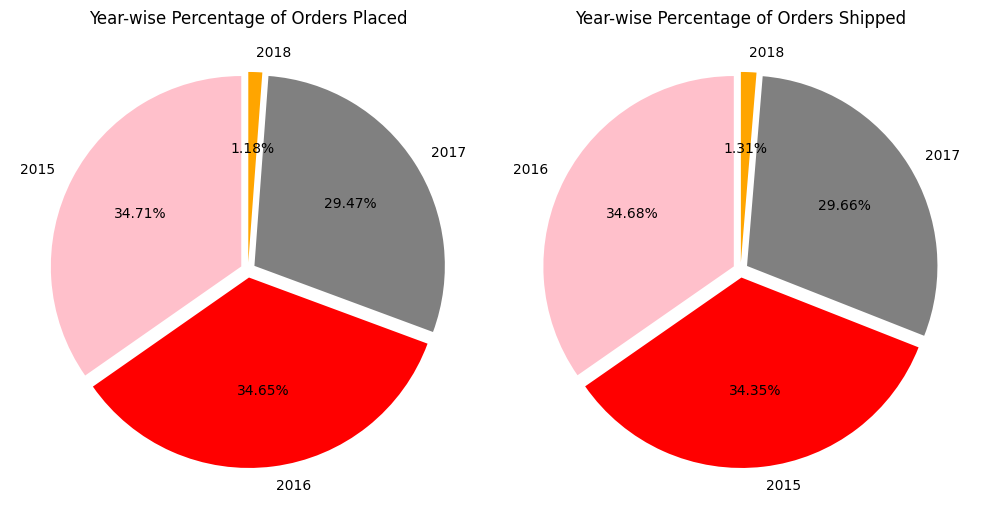

In [77]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
df['order_year'].value_counts().plot(
    kind='pie',
    autopct='%0.2f%%',
    explode=[0.04, 0.04, 0.04, 0.04],
    colors=['pink', 'red', 'gray', 'orange'],
    startangle=90
)
plt.title("Year-wise Percentage of Orders Placed")
plt.ylabel("")

plt.subplot(1, 2, 2)
df['shipping_year'].value_counts().plot(
    kind='pie',
    autopct='%0.2f%%',
    explode=[0.04, 0.04, 0.04, 0.04],
    colors=['pink', 'red', 'gray', 'orange'],
    startangle=90
)
plt.title("Year-wise Percentage of Orders Shipped")
plt.ylabel("")

plt.tight_layout()
plt.show()

In [78]:
# Checking Columns
df.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)',
       'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status',
       'Late_delivery_risk', 'Category_Id', 'Category_Name', 'Customer_City',
       'Customer_Country', 'Customer_Email', 'Customer_Fname', 'Customer_Id',
       'Customer_Lname', 'Customer_Password', 'Customer_Segment',
       'Customer_State', 'Customer_Street', 'Customer_Zipcode',
       'Department_Id', 'Department_Name', 'Latitude', 'Longitude', 'Market',
       'Order_City', 'Order_Country', 'Order_Customer_Id',
       'order_date_(DateOrders)', 'Order_Id', 'Order_Item_Cardprod_Id',
       'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Order_Item_Id',
       'Order_Item_Product_Price', 'Order_Item_Profit_Ratio',
       'Order_Item_Quantity', 'Sales', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Order_Region', 'Order_State', 'Order_Status',
       'Product_Card_Id', 'Product_Category_Id', 'Product_Image',
       'Product_Na

In [ ]:
def generate_all_crosstabs(df):

    crosstabs = {}

    # 1. Delivery and Shipping Performance

    crosstabs['shipping_vs_delivery_status'] = pd.crosstab(
        df['Shipping_Mode'],
        df['Delivery_Status'],
        normalize='index',
        margins=True
    )

    crosstabs['shipping_vs_late_delivery_risk'] = pd.crosstab(
        df['Shipping_Mode'],
        df['Late_delivery_risk'],
        margins=True
    )

    crosstabs['scheduled_vs_actual_shipping_days'] = pd.crosstab(
        df['Days_for_shipment_(scheduled)'],
        df['Days_for_shipping_(real)']
    )

    crosstabs['order_status_vs_delivery_status'] = pd.crosstab(
        df['Order_Status'],
        df['Delivery_Status'],
        margins=True
    )

    # 2. Customer and Market Analysis

    crosstabs['customer_segment_vs_late_delivery_risk'] = pd.crosstab(
        df['Customer_Segment'],
        df['Late_delivery_risk'],
        normalize='index'
    )

    crosstabs['market_vs_delivery_status'] = pd.crosstab(
        df['Market'],
        df['Delivery_Status'],
        normalize='index'
    )

    top_countries = df['Order_Country'].value_counts().head(10).index
    crosstabs['top_countries_vs_late_delivery_risk'] = pd.crosstab(
        df[df['Order_Country'].isin(top_countries)]['Order_Country'],
        df['Late_delivery_risk'],
        normalize='index'
    )

    # 3. Product, Category, and Department Insights

    crosstabs['category_vs_delivery_status'] = pd.crosstab(
        df['Category_Name'],
        df['Delivery_Status'],
        normalize='index'
    )

    crosstabs['product_status_vs_late_delivery_risk'] = pd.crosstab(
        df['Product_Status'],
        df['Late_delivery_risk']
    )

    crosstabs['department_vs_category_distribution'] = pd.crosstab(
        df['Department_Name'],
        df['Category_Name']
    )

    # 4. Profitability Analysis

    df['Profit_Bin'] = pd.cut(df['Order_Profit_Per_Order'], bins=5)

    crosstabs['customer_segment_vs_profit_distribution'] = pd.crosstab(
        df['Customer_Segment'],
        df['Profit_Bin'],
        normalize='index'
    )

    crosstabs['late_delivery_risk_vs_profit'] = pd.crosstab(
        df['Late_delivery_risk'],
        df['Profit_Bin'],
        normalize='index'
    )

    crosstabs['shipping_mode_vs_profit'] = pd.crosstab(
        df['Shipping_Mode'],
        df['Profit_Bin'],
        normalize='index'
    )

    # 5. Time-Based and Seasonal Patterns

    crosstabs['order_month_vs_late_delivery_risk'] = pd.crosstab(
        df['order_month'],
        df['Late_delivery_risk'],
        normalize='index'
    )

    crosstabs['order_year_vs_delivery_status'] = pd.crosstab(
        df['order_year'],
        df['Delivery_Status'],
        normalize='index'
    )

    crosstabs['shipping_month_vs_shipping_mode'] = pd.crosstab(
        df['shipping_month'],
        df['Shipping_Mode']
    )

    # 6. Advanced Multi-Dimensional Crosstabs

    crosstabs['category_shipping_mode_vs_late_delivery_risk'] = pd.crosstab(
        [df['Category_Name'], df['Shipping_Mode']],
        df['Late_delivery_risk'],
        normalize='index'
    )

    crosstabs['market_customer_segment_vs_profit'] = pd.crosstab(
        [df['Market'], df['Customer_Segment']],
        df['Profit_Bin'],
        normalize='index'
    )

    return crosstabs



In [83]:
crosstab_results = generate_all_crosstabs(df)
crosstab_results

{'shipping_vs_delivery_status': Delivery_Status  Advance shipping  Late delivery  Shipping canceled  \
 Shipping_Mode                                                         
 First Class              0.000000       0.953225           0.046775   
 Same Day                 0.000000       0.457430           0.045599   
 Second Class             0.000000       0.766328           0.040039   
 Standard Class           0.385997       0.380717           0.042681   
 All                      0.230402       0.548291           0.042954   
 
 Delivery_Status  Shipping on time  
 Shipping_Mode                      
 First Class              0.000000  
 Same Day                 0.496970  
 Second Class             0.193634  
 Standard Class           0.190604  
 All                      0.178352  ,
 'shipping_vs_late_delivery_risk': Late_delivery_risk      0      1     All
 Shipping_Mode                           
 First Class          1301  26513   27814
 Same Day             5283   4454    9737
 